## MNIST Dense Net (keras implementation)


In [1]:
# Imports
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
import numpy as np

Using TensorFlow backend.


In [2]:
# Training parameters
batch_size = 128
num_classes = 10
epochs = 12

60000 train samples
10000 test samples


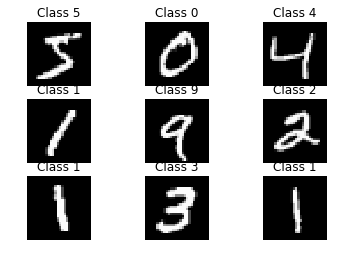

In [3]:
# Data preparation

# Input image dimensions
img_rows, img_cols = 28, 28

# The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

x_train = x_train.reshape(60000, img_cols * img_rows)
x_test = x_test.reshape(10000, img_cols * img_rows)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
# Model definition
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(img_cols * img_rows,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Training loop
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 2s 28us/step - loss: 0.5063 - acc: 0.8516 - val_loss: 0.2231 - val_acc: 0.9388
Epoch 2/12
60000/60000 [==============================] - 2s 25us/step - loss: 0.2760 - acc: 0.9207 - val_loss: 0.1664 - val_acc: 0.9518
Epoch 3/12
60000/60000 [==============================] - 2s 27us/step - loss: 0.2277 - acc: 0.9341 - val_loss: 0.1408 - val_acc: 0.9585
Epoch 4/12
60000/60000 [==============================] - 1s 24us/step - loss: 0.2017 - acc: 0.9411 - val_loss: 0.1276 - val_acc: 0.9603
Epoch 5/12
60000/60000 [==============================] - 1s 25us/step - loss: 0.1847 - acc: 0.9455 - val_loss: 0.1178 - val_acc: 0.9654
Epoch 6/12
60000/60000 [==============================] - 2s 26us/step - loss: 0.1695 - acc: 0.9495 - val_loss: 0.1088 - val_acc: 0.9678
Epoch 7/12
60000/60000 [==============================] - 1s 25us/step - loss: 0.1633 - acc: 0.9516 - val_loss: 0.1047 - val_acc

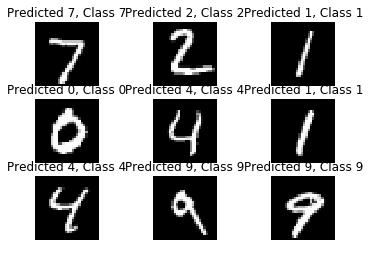

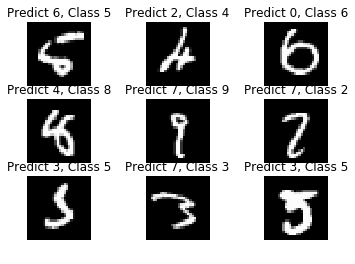

In [6]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
y_test = np.argmax(y_test, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predict {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))